# Absenteeism at Work – UCI Dataset Study

## Objective
** __To cluster absenteeism based on a set of features.__<br>
** __To predict different classes of absenteeism using Logistic Regression and Random Forest Methods.__

## Import Python Packages 

In [131]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from yellowbrick.model_selection import ValidationCurve #pip install yellowbrick before running this command
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
%matplotlib inline

### Import Absenteeism Dataset

In [132]:
#data = pd.read_excel("C:/Users/adity/Downloads/KaggleUCLA/Absenteeism_at_work.xls")
file_path = "C:\\Users\\Sandy\\Documents\\Python\\MLProjects\\AbsenteeismatWork\\"
data = pd.read_csv(file_path+'Absenteeism_at_work.csv',';')

__Dataset Source__:<br>
UCI Machine Learning Repository - [Absenteeism at work Data Set](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)<br><br>
__Creators & Donors__: Andrea Martiniano (1), Ricardo Pinto Ferreira (2), and Renato Jose Sassi (3).
__E-mail address__: 
andrea.martiniano'@'gmail.com (1) - PhD student; 
log.kasparov'@'gmail.com (2) - PhD student; 
sassi'@'uni9.pro.br (3) - Prof. Doctor.
<br><br>
__About The Dataset__:
* The dataset reports about the absenteeism at workplace at a courier company in Brazil
* The dataset is multivariate timeseries
* Reports about 740 instances of leaves described by 21 features consisting of information about the demographics of each person, distance from the work, different reasons of taking leave, work pressure metrics.

## Exploratory Data Analysis

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

### Check for missing values

In [133]:
percent_missing = ((data.isnull().sum()*100)/len(data))
print(percent_missing)

ID                                 0.0
Reason for absence                 0.0
Month of absence                   0.0
Day of the week                    0.0
Seasons                            0.0
Transportation expense             0.0
Distance from Residence to Work    0.0
Service time                       0.0
Age                                0.0
Work load Average/day              0.0
Hit target                         0.0
Disciplinary failure               0.0
Education                          0.0
Son                                0.0
Social drinker                     0.0
Social smoker                      0.0
Pet                                0.0
Weight                             0.0
Height                             0.0
Body mass index                    0.0
Absenteeism time in hours          0.0
dtype: float64


### Get Summary Statistics

In [101]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [134]:
data_empty = pd.DataFrame()
data_empty = data_empty.fillna(0) 
data_empty['Absenteeism time total']= data.groupby(['ID'])['Absenteeism time in hours'].sum() 
data = data.merge(data_empty,on=['ID'])

In [135]:
data.sort_values('ID', inplace=True)

In [136]:
data.to_excel('data_sorted.xlsx')
data_raw=data

__FINDINGS__: There are 43 values where reason of absence is '0'. No information is available for that value in the metadata file and so we will delete those observations. We noticed that most of them were related to disciplinary failure and we believe it might have led to the termination of the employee.

In [137]:
data = data[data['Reason for absence'] != 0]
data.reset_index(drop=True, inplace=True)

In [138]:
data_init = data[data['Reason for absence'] != 0]
data_init.reset_index(drop=True, inplace=True)

### Check for any correlation between different features in the dataset

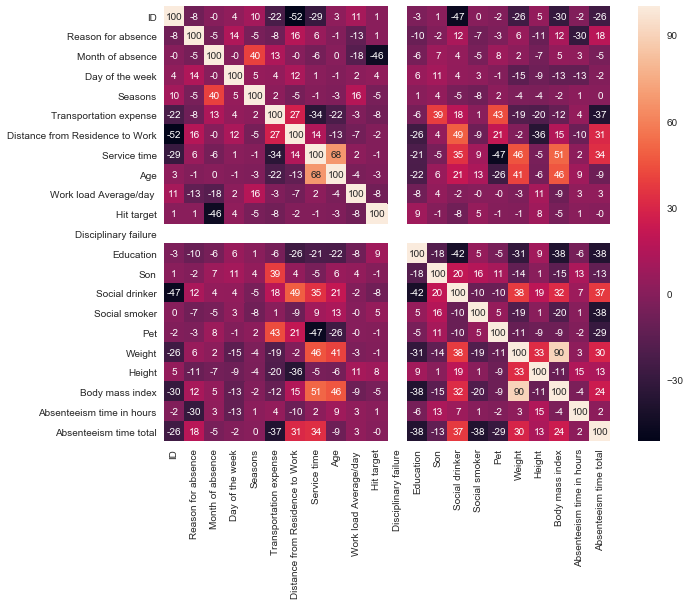

In [107]:
correlations = data.corr(method='pearson')
sn.set_style('white')
plt.figure(figsize=(10,8))

# Plot heatmap of annotated correlations
sn.heatmap(correlations*100, annot=True, fmt='.0f' )

__FINDINGS:__ Considering scores of 70 and above to be strongly correlated, we can see that BMI and weight are highly correlated. We will remove weight from the list of independent variables. Likewise, age and service time are highly correlated and hence we can remove age from the data.

### Assigning proper user readable values for all nominal value based columns

In [139]:
data['Reason for absence'] = ['Consultation' if val in (22,23,28) else ('Diseases' if val in (range(1,22)) 
                                else 'Other Reasons') for val in data['Reason for absence']]
data['Month of absence'] = ['January' if val == 1 else ('February' if val == 2 else 'March' if val == 3 
                            else 'April' if val == 4 else 'May' if val == 5 else 'June' if val == 6  else 'July' if val == 7 
                            else 'August' if val == 8 else 'September' if val == 9 else 'October' if val == 10 
                            else 'November' if val == 11 else 'December') for val in data['Month of absence']]
data['Day of the week'] = ['Monday' if val == 2 else ('Tuesday' if val == 3 else 'Wednesday' if val == 4 
                                     else 'Thursday' if val == 5 else 'Friday') for val in data['Day of the week']]
data['Seasons'] = ['Summer' if val == 1 else ('Autumn' if val == 2 else 'Winter' if val == 3
                                else 'Spring') for val in data['Seasons']]
data['Education'] = ['High School' if val == 1 else ('Graduate' if val == 2 else 'Post Graduate' if val == 3
                                else 'Doctorate') for val in data['Education']]
data['Social drinker'] = ['Yes_drink' if val == 1 else 'No_drink' for val in data['Social drinker']]
data['Social smoker'] = ['Yes_smoke' if val == 1 else 'No_smoke' for val in data['Social smoker']]
data.rename(columns = {'Work load Average/day ':'Work load Average per day'}, inplace = True)

### Create Summary Dataset for Analysis

In [140]:
data_summary = pd.DataFrame()
data_summary = data_summary.fillna(0) 
data_summary['Absenteeism time total']= data_init.groupby(['ID'])['Absenteeism time in hours'].sum() 
data_summary.reset_index(['ID'],inplace=True)
data_summary=pd.merge(data_summary, data_init, how='right', left_on=['ID'], right_on=['ID'])
data_summary.rename(columns = {'Work load Average/day ':'Work load Average per day'}, inplace = True)
cols =['Reason for absence','Month of absence','Absenteeism time in hours','Day of the week','Work load Average per day','Disciplinary failure','Seasons','Hit target']
data_summary.drop(data_summary[cols],axis=1,inplace=True)
data_summary.drop_duplicates(inplace=True)
data_summary['Social drinker'] = ['Yes_drink' if val == 1 else 'No_drink' for val in data_summary['Social drinker']]
data_summary['Social smoker'] = ['Yes_smoke' if val == 1 else 'No_smoke' for val in data_summary['Social smoker']]

### Analysis of summary level data of unique Panel IDs

Text(0,0.5,'Number of Child')

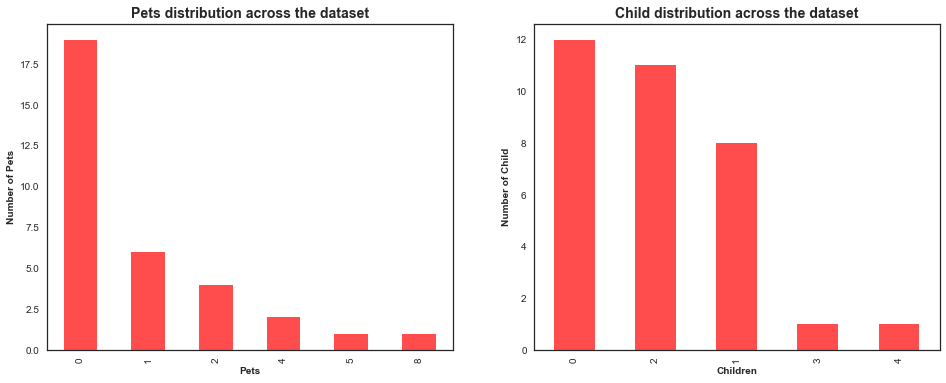

In [110]:
pet_counts=data_summary['Pet'].value_counts().sort_values(ascending=False)
son_counts=data_summary['Son'].value_counts().sort_values(ascending=False)
fig, ax=plt.subplots(1,2,figsize=(16,6))
pet_counts.plot.bar(ax = ax[0],alpha=0.7,color='red' )
ax[0].set_title('Pets distribution across the dataset',weight='bold',fontsize=14) # Give the plot a main title
ax[0].set_xlabel('Pets',weight='bold',fontsize=10) # Set text for the x axis
ax[0].set_ylabel('Number of Pets',weight='bold',fontsize=10)# Set text for y axis
son_counts.plot.bar(ax = ax[1],alpha=0.7,color='red' )
ax[1].set_title('Child distribution across the dataset',weight='bold',fontsize=14) # Give the plot a main title
ax[1].set_xlabel('Children',weight='bold',fontsize=10) # Set text for the x axis
ax[1].set_ylabel('Number of Child',weight='bold',fontsize=10)# Set text for y axis

Text(0,0.5,'Number of Drinkers')

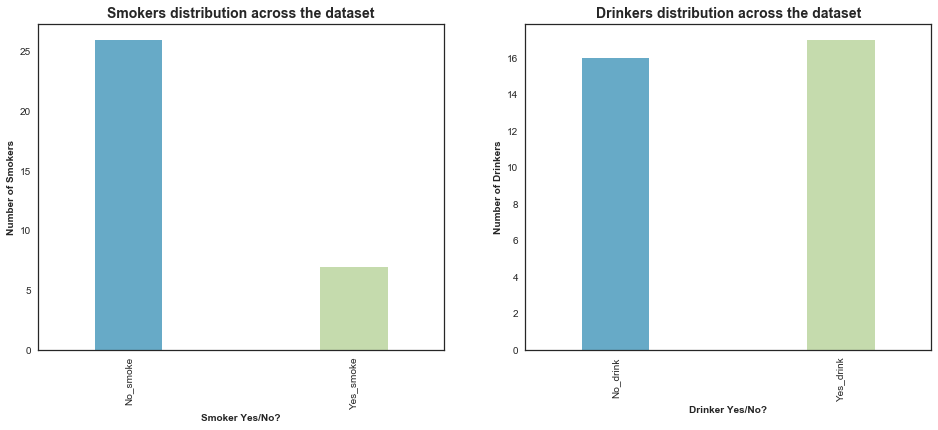

In [111]:
smoke_counts=data_summary['Social smoker'].value_counts().sort_index()
drink_counts=data_summary['Social drinker'].value_counts().sort_index()
fig, ax=plt.subplots(1,2,figsize=(16,6))
smoke_counts.plot.bar(ax = ax[0],alpha=0.6,width=0.3 )
ax[0].set_title('Smokers distribution across the dataset',weight='bold',fontsize=14) # Give the plot a main title
ax[0].set_xlabel('Smoker Yes/No?',weight='bold',fontsize=10) # Set text for the x axis
ax[0].set_ylabel('Number of Smokers',weight='bold',fontsize=10)# Set text for y axis
drink_counts.plot.bar(ax = ax[1],alpha=0.6,width=0.3  )
ax[1].set_title('Drinkers distribution across the dataset',weight='bold',fontsize=14) # Give the plot a main title
ax[1].set_xlabel('Drinker Yes/No?',weight='bold',fontsize=10) # Set text for the x axis
ax[1].set_ylabel('Number of Drinkers',weight='bold',fontsize=10)# Set text for y axis

Text(0,0.5,'Number of leave taken')

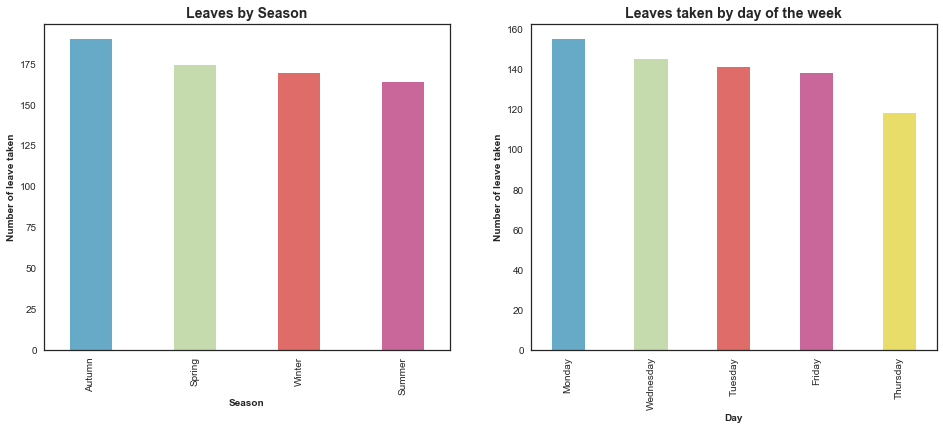

In [112]:
season_counts=data['Seasons'].value_counts().sort_values(ascending=False)
day_counts=data['Day of the week'].value_counts().sort_values(ascending=False)
fig, ax=plt.subplots(1,2,figsize=(16,6))
season_counts.plot.bar(ax = ax[0],alpha=0.6,width=0.4 )
ax[0].set_title('Leaves by Season',weight='bold',fontsize=14) # Give the plot a main title
ax[0].set_xlabel('Season',weight='bold',fontsize=10) # Set text for the x axis
ax[0].set_ylabel('Number of leave taken',weight='bold',fontsize=10)# Set text for y axis
day_counts.plot.bar(ax = ax[1],alpha=0.6,width=0.4  )
ax[1].set_title('Leaves taken by day of the week',weight='bold',fontsize=14) # Give the plot a main title
ax[1].set_xlabel('Day',weight='bold',fontsize=10) # Set text for the x axis
ax[1].set_ylabel('Number of leave taken',weight='bold',fontsize=10)# Set text for y axis

### Understanding data distribution of each feature through histograms

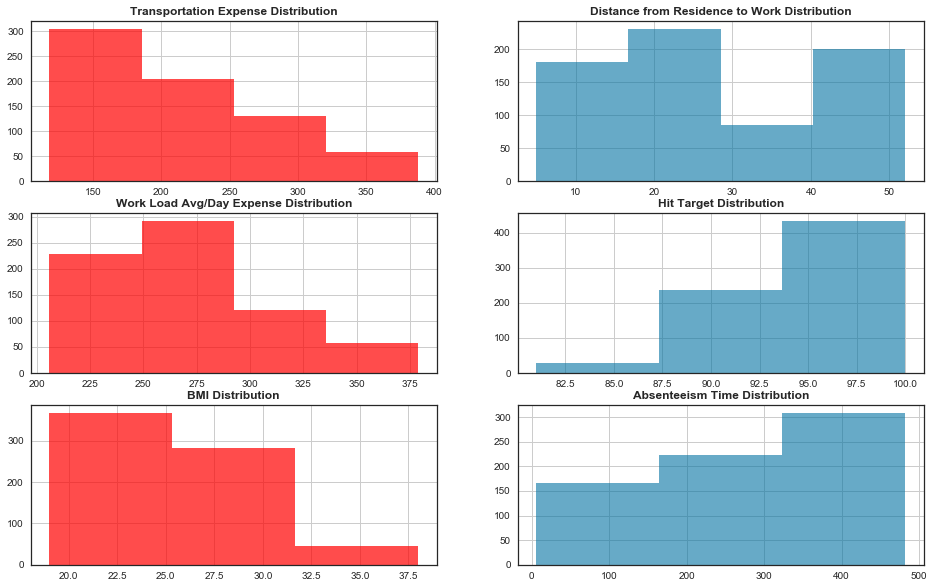

In [113]:
fig = plt.figure(figsize=(16,10))
plt.subplot(321)
plt.hist(data['Transportation expense'], bins = 4,color='red',alpha=0.7)
plt.title('Transportation Expense Distribution',fontsize=12,weight='bold')
plt.grid(True)
plt.subplot(322)
plt.hist(data['Distance from Residence to Work'], bins = 4,alpha=0.6)
plt.title('Distance from Residence to Work Distribution',fontsize=12,weight='bold')
plt.grid(True)
plt.subplot(323)
plt.hist(data['Work load Average per day'], bins = 4,color='red',alpha=0.7)
plt.title('Work Load Avg/Day Expense Distribution',fontsize=12,weight='bold')
plt.grid(True)
plt.subplot(324)
plt.hist(data['Hit target'], bins = 3,alpha=0.6)
plt.title('Hit Target Distribution',fontsize=12,weight='bold')
plt.grid(True)
plt.subplot(325)
plt.hist(data['Body mass index'], bins = 3,color='red',alpha=0.7)
plt.title('BMI Distribution',fontsize=12,weight='bold')
plt.grid(True)
plt.subplot(326)
plt.hist(data['Absenteeism time total'], bins = 3,alpha=0.6)
plt.title('Absenteeism Time Distribution',fontsize=12,weight='bold')
plt.grid(True)

### Based on the above distributions - a logical grouping of columns is made so that a meaningful analysis of features can be carried forward

In [141]:
data['Transportation expense'] = ['Very Expensive' if val in (range (110,181)) else ('Expensive' if val in (range(180,251)) 
                                else 'Moderate rate' if val in (range(250,321)) else 'Çheap') for val in data['Transportation expense']]
data['Distance from Residence to Work'] = ['Near' if val in (range(0,16)) else ('Moderate distance' if val in (range(16,31))
                                else 'Far' if val in (range(31,45)) else 'Very Far') for val in data['Distance from Residence to Work']]
data['Work load Average per day'] = ['Less' if val in (range(1,250001)) else ('Medium' if val in (range(250001,300001))
                                else 'Hectic' if val in (range(300001,350001)) else 'Very Hectic') for val in data['Work load Average per day']]
data['Hit target'] = ['Low target' if val in (range(80,91)) else ('Medium target' if val in (range(91,95))
                                else 'High target' if val in (range(95,98)) else 'Very High target') for val in data['Hit target']]
data['Body mass index'] = ['Normal' if val in (range(19,25)) else ('Overweight' if val in (range(25,31))
                     else 'Obese') for val in data['Body mass index']]
data['Absenteeism time classification'] = ['Highly efficient' if val in (range(1,161)) else ('Moderately Efficient' if val in (range(161,321))
                     else 'Inefficient') for val in data['Absenteeism time total']]
data['Service time groups'] = ['Fresher' if val in (range(1,4)) else ('Experienced' if val in (range(4,10))
                                else 'Senior' if val in (range(10,16)) else 'Super Senior') for val in data['Service time']]
data.to_excel('data_output.xlsx')

### Getting dummy values for all nominal variables in the dataset

In [142]:
data_Reason = pd.get_dummies(data['Reason for absence'])
data_Month = pd.get_dummies(data['Month of absence'])
data_Day = pd.get_dummies(data['Day of the week'])
data_Season = pd.get_dummies(data['Seasons'])
data_Transportationexpense = pd.get_dummies(data['Transportation expense'])
data_Distance = pd.get_dummies(data['Distance from Residence to Work'])
data_Workload = pd.get_dummies(data['Work load Average per day'])
data_Hittarget = pd.get_dummies(data['Hit target'])
data_Education = pd.get_dummies(data['Education'])
data_drinker = pd.get_dummies(data['Social drinker'])
data_smoker = pd.get_dummies(data['Social smoker'])
data_BMI = pd.get_dummies(data['Body mass index'])
data_absenteeism = pd.get_dummies(data['Absenteeism time classification'])
data_experience = pd.get_dummies(data['Service time groups'])

data = pd.concat([data, data_Reason, data_Month, data_Day, data_Season, data_Transportationexpense, data_Distance, 
                  data_Workload, data_Hittarget, data_Education, data_drinker, data_smoker, data_BMI, data_absenteeism,
                 data_experience], axis=1)
data.drop(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 
           'Distance from Residence to Work', 'Work load Average per day', 'Hit target', 'Education', 'Social drinker', 
            'Social smoker', 'Body mass index', 'Absenteeism time classification', 'Service time groups' ], axis=1, inplace=True)
data.to_excel('data_modified.xlsx')

In [144]:
x_cluster = data.drop(['Absenteeism time in hours','Disciplinary failure','ID','Fresher','Experienced','Senior','Super Senior',
              'Highly efficient','Moderately Efficient','Inefficient'], axis = 1)

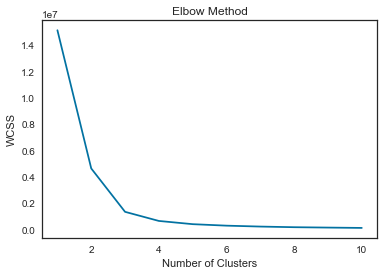

In [145]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
    kmeans.fit(x_cluster)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [170]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
kmeans.fit(x_cluster)
labels =kmeans.predict(x_cluster)
entroids = kmeans.cluster_centers_
label= pd.DataFrame(labels)
label.columns=['Cluster_Group']
outp = pd.DataFrame()
outp = pd.concat([x_cluster,label],axis=1)

In [171]:
outp.columns

Index(['Service time', 'Age', 'Son', 'Pet', 'Weight', 'Height',
       'Absenteeism time total', 'Consultation', 'Diseases', 'Other Reasons',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'Friday', 'Monday',
       'Thursday', 'Tuesday', 'Wednesday', 'Autumn', 'Spring', 'Summer',
       'Winter', 'Expensive', 'Moderate rate', 'Very Expensive', 'Çheap',
       'Far', 'Moderate distance', 'Near', 'Very Far', 'Very Hectic',
       'High target', 'Low target', 'Medium target', 'Very High target',
       'Doctorate', 'Graduate', 'High School', 'Post Graduate', 'No_drink',
       'Yes_drink', 'No_smoke', 'Yes_smoke', 'Normal', 'Obese', 'Overweight',
       'Cluster_Group'],
      dtype='object')

In [168]:
outp.to_excel('Clusters.xlsx')`

### Based on the WSS plot, the optimum number of clusters is 3

### We will run a logistic regression model and a random forest model to predict the 3 classes of absenteeism

### Before we run different classification algorithms, we will define a function that will list the classification report, different classification metrics and the ROC Curve

In [65]:
def logistic_metrics(log_final,y_test,y_pred_log):
    log_metrics = {'Accuracy' : metrics.accuracy_score(y_test, y_pred_log),
                     'Precision' : metrics.precision_score(y_test, y_pred_log),
                     'Recall' : metrics.recall_score(y_test, y_pred_log),
                     'F1 Score' : metrics.f1_score(y_test, y_pred_log),
                    }


    df_logmetrics = pd.DataFrame.from_dict(log_metrics, orient='index')
    #df_logmetrics.columns = [log_columns]
    
    print('\nConfusion Matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_log)
    
    print('\nClassification Report:')
    print(metrics.classification_report(y_test,y_pred_log,digits=2))
    
    print('\nMetrics:')
    print(df_logmetrics)
    
    return  df_logmetrics

In [66]:
def plot_roc(model,x_test,y_test):
    model_proba = model.predict_proba(x_test)
    fig = plt.figure()
    ax1 = fig.add_subplot()
    skplt.metrics.plot_roc(y_test,model_proba ,figsize = (15,7),title_fontsize='large',text_fontsize='large')                
    return None

### Running a logistic regression to predict the 3 classes of absenteeism

In [71]:
x_class = data.drop(['Absenteeism time in hours','Disciplinary failure','ID','Service time','Age','Weight','Height',
                     'Absenteeism time total','Highly efficient','Moderately Efficient','Inefficient'], axis = 1)
y1 = data['Highly efficient']
y2 = data['Inefficient']
y3 = data['Moderately Efficient']

In [72]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_class, y1, test_size = 0.1, random_state = 10)
x2_train, x2_test, y2_train, y2_test = train_test_split(x_class, y2, test_size = 0.1, random_state = 15)
x3_train, x3_test, y3_train, y3_test = train_test_split(x_class, y3, test_size = 0.1, random_state = 20)

In [73]:
model = 'Logistic Regression'
for i in np.arange(0.1,50,10):
    log_he = LogisticRegression(random_state = 10, solver = 'liblinear', penalty = 'l1', C = i, class_weight = {0:1,1:4.5})
    log_he.fit(x1_train, y1_train)
    print("C value for high efficiency",i,"The training accuracy is",log_he.score(x1_train,y1_train),
          "and the test accuracy is",log_he.score(x1_test,y1_test))
    log_ie = LogisticRegression(random_state = 10, solver = 'liblinear', penalty = 'l1', C = i, class_weight = {0:1,1:2.5})
    log_ie.fit(x2_train, y2_train)
    print("C value for inefficiency",i,"The training accuracy is",log_ie.score(x2_train,y2_train),
          "and the test accuracy is",log_ie.score(x2_test,y2_test))
    log_me = LogisticRegression(random_state = 10, solver = 'liblinear', penalty = 'l1', C = i, class_weight = {0:1,1:3})
    log_me.fit(x3_train, y3_train)
    print("C value for moderate efficiency",i,"The training accuracy is",log_me.score(x3_train,y3_train),
          "and the test accuracy is",log_me.score(x3_test,y3_test))

C value for high efficiency 0.1 The training accuracy is 0.9936204146730463 and the test accuracy is 1.0
C value for inefficiency 0.1 The training accuracy is 0.8628389154704944 and the test accuracy is 0.9285714285714286
C value for moderate efficiency 0.1 The training accuracy is 0.9154704944178629 and the test accuracy is 0.8857142857142857
C value for high efficiency 10.1 The training accuracy is 1.0 and the test accuracy is 1.0
C value for inefficiency 10.1 The training accuracy is 1.0 and the test accuracy is 1.0
C value for moderate efficiency 10.1 The training accuracy is 0.9984051036682615 and the test accuracy is 0.9571428571428572
C value for high efficiency 20.1 The training accuracy is 1.0 and the test accuracy is 1.0
C value for inefficiency 20.1 The training accuracy is 1.0 and the test accuracy is 1.0
C value for moderate efficiency 20.1 The training accuracy is 0.9984051036682615 and the test accuracy is 0.9571428571428572
C value for high efficiency 30.1 The training 

### We will take the C value based on the validation curve results

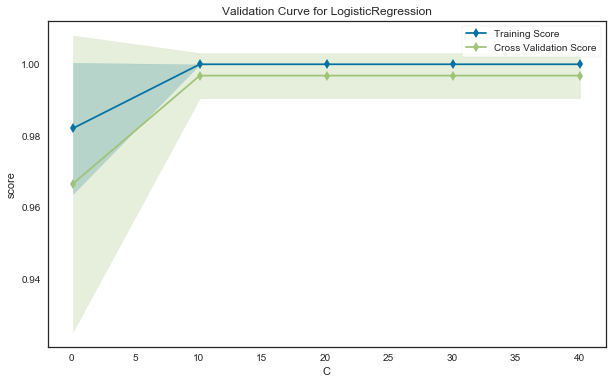

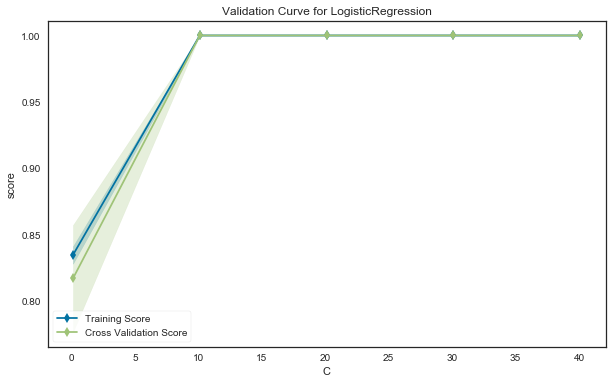

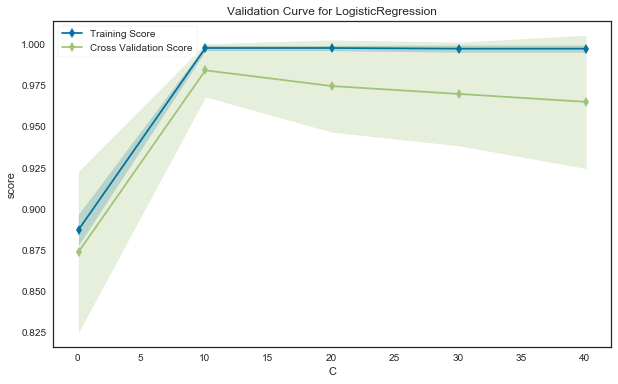

In [74]:
def viz_plot(log,x,y):
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    viz = ValidationCurve(log, ax=ax, param_name="C",
          param_range=np.arange(0.1,50,10), cv=5, scoring="accuracy")
    viz.fit(x, y)
    viz.poof()
viz_plot(log_he,x1_train,y1_train)
viz_plot(log_he,x2_train, y2_train)
viz_plot(log_me,x3_train, y3_train)

### We will take C value as 10 for all 3 groups based on the validation curve results

In [75]:
log_he = LogisticRegression(random_state = 10, class_weight = {0:1,1:4.5}, solver = 'liblinear', penalty = 'l1', C = 10)
log_ie = LogisticRegression(random_state = 10, class_weight = {0:1,1:2.5}, solver = 'liblinear', penalty = 'l1', C = 10)
log_me = LogisticRegression(random_state = 10, class_weight = {0:1,1:3}, solver = 'liblinear', penalty = 'l1', C = 10)
log_he.fit(x1_train,y1_train)
print("Training Score for high efficiency:{:.3f}".format(log_he.score(x1_train,y1_train)))
log_ie.fit(x2_train,y2_train)
print("Training Score for inefficiency:{:.3f}".format(log_ie.score(x2_train,y2_train)))
log_me.fit(x3_train,y3_train)
print("Training Score for moderate efficiency:{:.3f}".format(log_me.score(x3_train,y3_train)))

Training Score for high efficiency:1.000
Training Score for inefficiency:1.000
Training Score for moderate efficiency:0.998


In [76]:
y1_predict_log = log_he.predict(x1_test)
y2_predict_log = log_ie.predict(x2_test)
y3_predict_log = log_me.predict(x3_test)


Confusion Matrix:

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        57
          1       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        70


Metrics:
             0
Accuracy   1.0
Precision  1.0
Recall     1.0
F1 Score   1.0

Confusion Matrix:

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        40
          1       1.00      1.00      1.00        30

avg / total       1.00      1.00      1.00        70


Metrics:
             0
Accuracy   1.0
Precision  1.0
Recall     1.0
F1 Score   1.0

Confusion Matrix:

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.94      0.97        47
          1       0.88      1.00      0.94        23

avg / total       0.96      0.96      0.96        70


Metrics:
                  0
Accuracy   0.957143
Precis

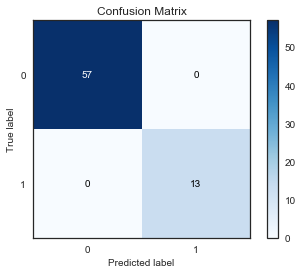

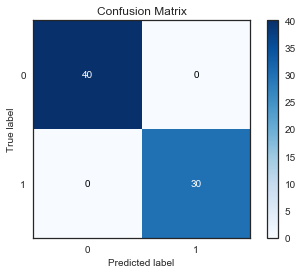

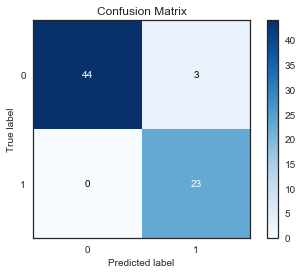

In [172]:
x_test = [x1_test,x2_test,x3_test]
y_test = [y1_test,y2_test,y3_test]
log_final = [log_he,log_ie,log_me]
log_columns = ['High Efficiency log','Inefficiency log','Moderate Efficiency log']
y_pred_log = [y1_predict_log,y2_predict_log,y3_predict_log]
df_log = pd.DataFrame()
for i in range(0,3,1):
    temp=pd.DataFrame(logistic_metrics(log_final[i],y_test[i],y_pred_log[i]))
    df_log = pd.concat([df_log,temp],axis=1)
df_log.columns=log_columns

In [173]:
df_log

,High Efficiency log,Inefficiency log,Moderate Efficiency log
Accuracy,1.0,1.0,0.957143
Precision,1.0,1.0,0.884615
Recall,1.0,1.0,1.000000
F1 Score,1.0,1.0,0.938776


<Figure size 432x288 with 0 Axes>

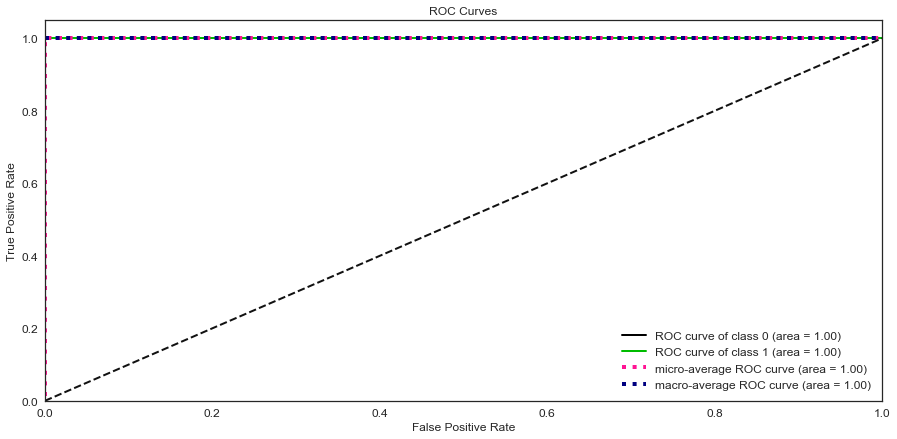

<Figure size 432x288 with 0 Axes>

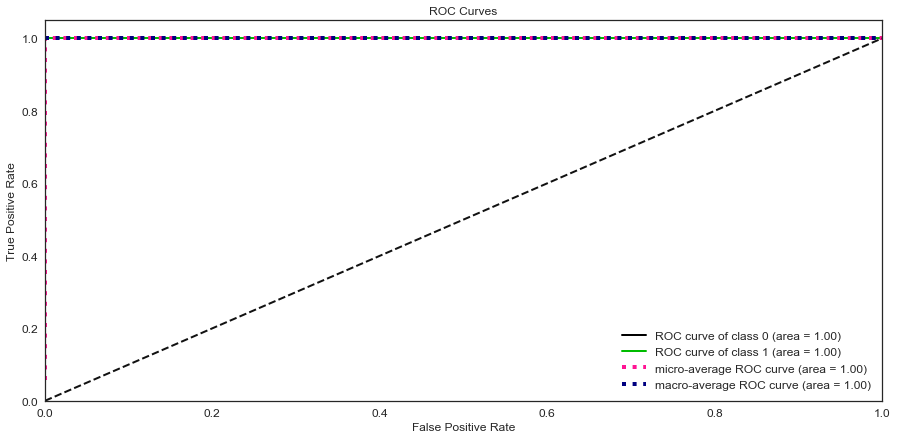

<Figure size 432x288 with 0 Axes>

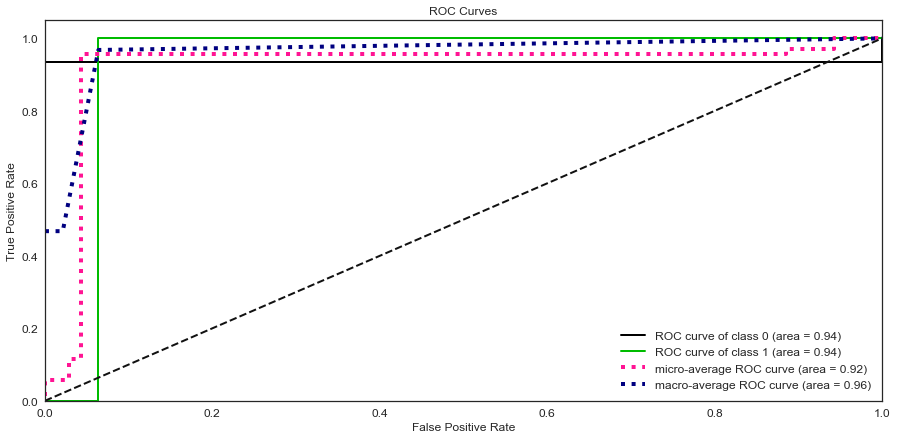

In [174]:
for i in range(0,3,1):
    plot_roc(log_final[i],x_test[i],y_test[i])

### Accuracy for moderate efficiency prediction seems to be on the higher side. We will run a random forest classifier to see if there is an improvement in the accuracy scores 

### RANDOM FOREST CLASSIFIER

In [175]:
ranf1 = RandomForestClassifier(random_state=100, oob_score = True, n_jobs = -1, class_weight = {0:1,1:4.5})
ranf2 = RandomForestClassifier(random_state=100, oob_score = True, n_jobs = -1, class_weight = {0:1,1:2.5})
ranf3 = RandomForestClassifier(random_state=100, oob_score = True, n_jobs = -1, class_weight = {0:1,1:3})
ranf1.fit(x1_train,y1_train)
print("Training score for highly efficient people:{:.3f}".format(ranf1.score(x1_train,y1_train)))
print("Test score for highly efficient people:{:.3f}".format(ranf1.score(x1_test,y1_test)))
ranf2.fit(x2_train,y2_train)
print("Training score for inefficient people:{:.3f}".format(ranf2.score(x2_train,y2_train)))
print("Test score for inefficient people:{:.3f}".format(ranf2.score(x2_test,y2_test)))
ranf3.fit(x3_train,y3_train)
print("Training score for moderately efficient people:{:.3f}".format(ranf3.score(x3_train,y3_train)))
print("Test score for moderately efficient people:{:.3f}".format(ranf3.score(x3_test,y3_test)))

Training score for highly efficient people:1.000
Test score for highly efficient people:1.000
Training score for inefficient people:1.000
Test score for inefficient people:1.000
Training score for moderately efficient people:1.000
Test score for moderately efficient people:0.986


In [176]:
y1_predict_ran = ranf1.predict(x1_test)
y2_predict_ran = ranf2.predict(x2_test)
y3_predict_ran = ranf3.predict(x3_test)

In [177]:
def RF_metrics(ran_final,y_test,y_pred_ran):
    RF_metrics = {'Accuracy' : metrics.accuracy_score(y_test, y_pred_ran),
                     'Precision' : metrics.precision_score(y_test, y_pred_ran),
                     'Recall' : metrics.recall_score(y_test, y_pred_ran),
                     'F1 Score' : metrics.f1_score(y_test, y_pred_ran),
                    }


    df_RFmetrics = pd.DataFrame.from_dict(RF_metrics, orient='index')
    #df_RFmetrics.columns = [ran_columns]
    
    print('\nConfusion Matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_ran)
    
    print('\nClassification Report:')
    print(metrics.classification_report(y_test,y_pred_ran,digits=2))
    
    print('\nMetrics:')
    print(df_RFmetrics)
    
    return  df_RFmetrics


Confusion Matrix:

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        57
          1       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        70


Metrics:
             0
Accuracy   1.0
Precision  1.0
Recall     1.0
F1 Score   1.0

Confusion Matrix:

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        40
          1       1.00      1.00      1.00        30

avg / total       1.00      1.00      1.00        70


Metrics:
             0
Accuracy   1.0
Precision  1.0
Recall     1.0
F1 Score   1.0

Confusion Matrix:

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        47
          1       0.96      1.00      0.98        23

avg / total       0.99      0.99      0.99        70


Metrics:
                  0
Accuracy   0.985714
Precis

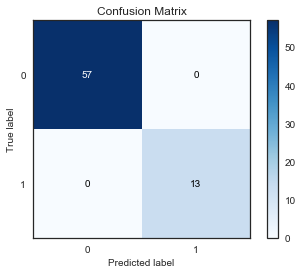

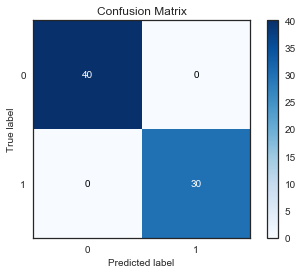

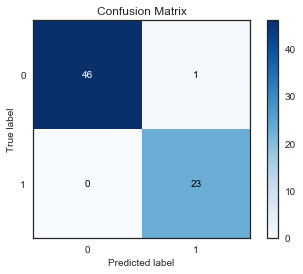

In [178]:
ran_final = [ranf1,ranf2,ranf3]
ran_columns = ['High Efficiency ran','Inefficiency ran','Moderate Efficiency ran']
y_pred_ran = [y1_predict_ran,y2_predict_ran,y3_predict_ran]
df_rand =pd.DataFrame()
for i in range(0,3,1):
    temp =pd.DataFrame(RF_metrics(ran_final[i],y_test[i],y_pred_ran[i]))
    df_rand = pd.concat([df_rand,temp],axis=1)
df_rand.columns=ran_columns

In [179]:
df_rand

,High Efficiency ran,Inefficiency ran,Moderate Efficiency ran
Accuracy,1.0,1.0,0.985714
Precision,1.0,1.0,0.958333
Recall,1.0,1.0,1.000000
F1 Score,1.0,1.0,0.978723


<Figure size 432x288 with 0 Axes>

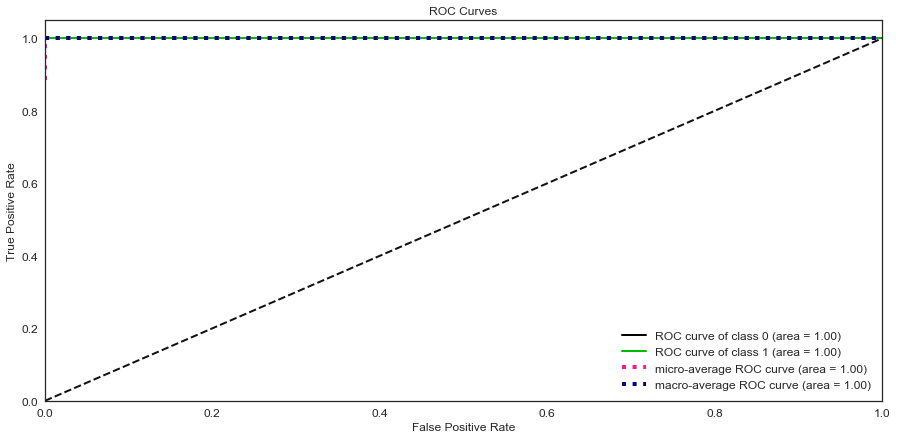

<Figure size 432x288 with 0 Axes>

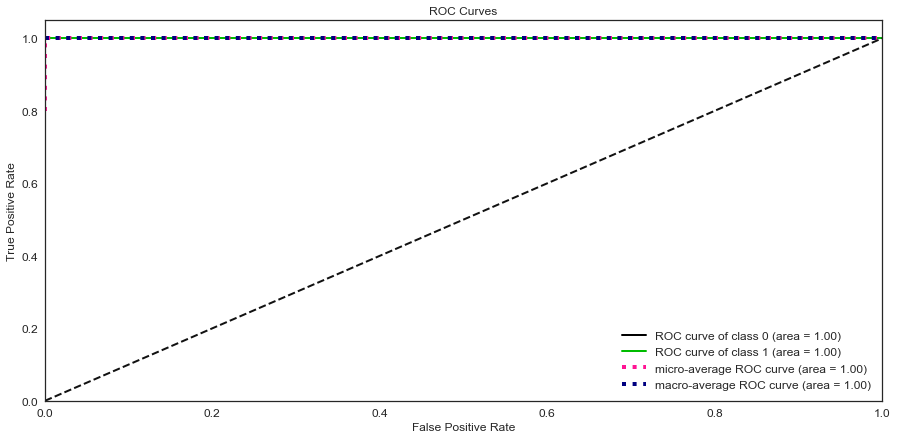

<Figure size 432x288 with 0 Axes>

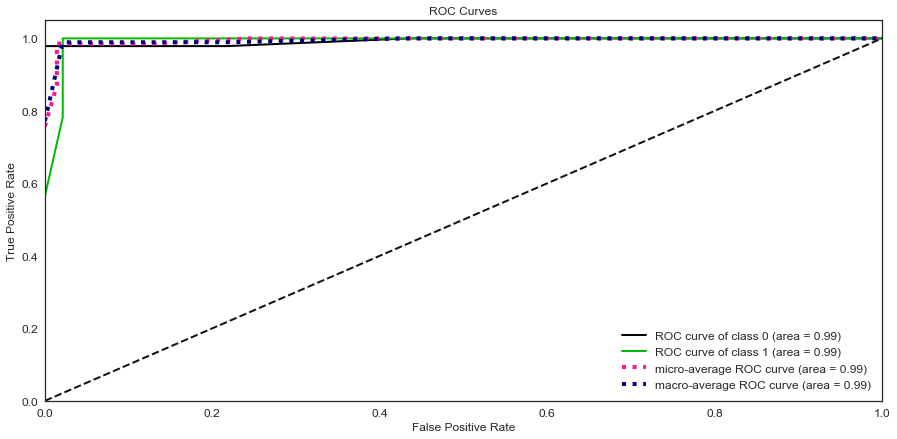

In [180]:
for i in range(0,3,1):
    plot_roc(ran_final[i],x_test[i],y_test[i])

## Conclusion
- Since the dataset consists of only 697 observations for 36 individuals over a 3-year period, there is high correlation between observations which leads to near perfect accuracies.
- However, random forest method has improved the accuracy and precision of predicting moderate efficiency groups by 3% and 7% respectively.
- The following insights have been obtained from KMeans clustering:
    - __Cluster 1__ - More than 450 hours of absence over 3 years, Most of them belong to obese category and some belong to overweight category, all of them drink and none of them smoke, 0 or 2 kids, Highest education obtained is High school, Very Hectic work schedule, age 33 - 38, service time 13 - 18 years, transporation expense very expensive
    - __Cluster 2__ - Predominantly highly efficient workers with less than 160 hours of absence over 3 years, all smokers belong to this cluster, predominantly non-drinkers. <br>
    - __Cluster 3__ - Predominantly moderately efficient with hours of absence ranging from 160 - 450, Very less obese percentage, having 2 or less pets, all non-smokers, predominantly high school graduates, service time 9-18 years.


## References

* [Kaggle Kernel](https://www.kaggle.com/loganalive/absenteeism-at-work-uci-repository) - Rahul Bhaskaran

***